In [2]:
import pandas as pd
import numpy as np

In [76]:
SCENARIO_NUMBER = 3
options = {
    0:(5.0,'put'),
    1:(5.5,'put'),
    2:(6.0,'put'),
    3:(6.5,'put'),
    4:(7.0,'put'),
    5:(7.5,'put'),
    6:(8.0,'put'),
    7:(5.0,'call'),
    8:(5.5,'call'),
    9:(6.0,'call'),
    10:(6.5,'call'),
    11:(7.0,'call'),
    12:(7.5,'call'),
    13:(8.0,'call'),
}
scenario = pd.read_csv('104/Scenario'+ str(SCENARIO_NUMBER) +'.csv')
prices = pd.read_csv('104/option_prices_scenario_'+ str(SCENARIO_NUMBER) + '.csv')
prices_list = prices['Price [USD]'].to_list()
scenario_list = scenario.to_dict(orient='list')

In [77]:
scenario['total'] = scenario['yield [thousands of bushels]'] * scenario['price [$/bushel]'] * 1000

<Axes: ylabel='Frequency'>

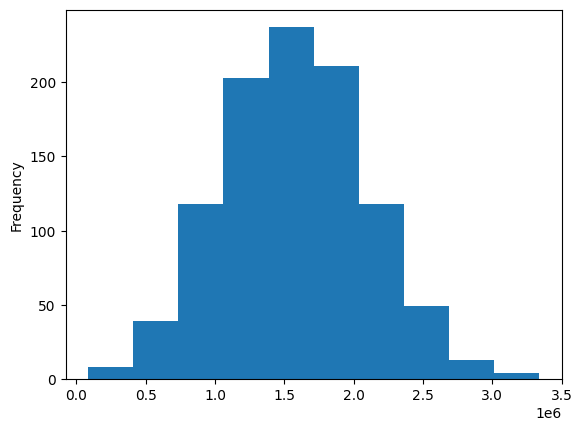

In [78]:
scenario['total'].plot.hist()

In [79]:
def calculate_profit(strike, market_price, typ):
    if typ == 'call':
        return max(100 * (market_price - strike), 0.0)
    return max(100 * (strike - market_price), 0.0)


In [80]:
def profit(option_prices, yi, market_price, strategy):
    res = yi * market_price * 1000
    before_options = res
    for i in range(14):
        strike, typ = options[i]
        res += strategy[i] * calculate_profit(strike, market_price, typ)
        res -= option_prices[i] * strategy[i]
    return res

In [81]:
def get_incomes_of_strategy(strategy, market_prices, yields, option_prices, return_quantiles=False):
    profits = []
    for i in range(1000):
        curr_profit = profit(option_prices, yields[i], market_prices[i], strategy)
        profits.append(curr_profit)
    return profits

In [70]:
strat = [256.0, 136.0, 332.0, 622.0, 1221.0, 180.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [71]:
total_options = get_incomes_of_strategy(strat, scenario_list['price [$/bushel]'], scenario_list['yield [thousands of bushels]'], prices_list,)

In [72]:
scenario['expected_income_options'] = total_options

<Axes: ylabel='Frequency'>

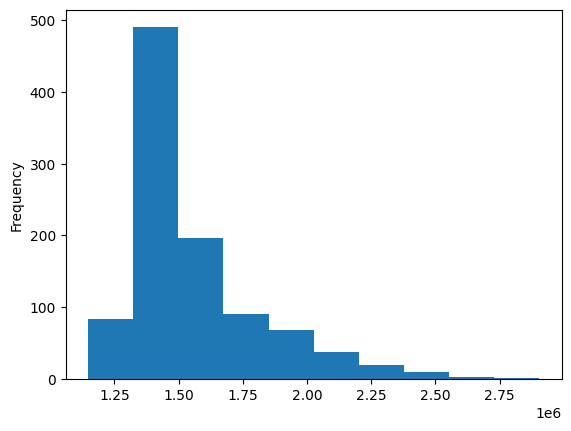

In [73]:
scenario['expected_income_options'].plot.hist()

In [74]:
scenario

,yield [thousands of bushels],price [$/bushel],total,expected_income_options
0,213.45,4.418,943022.10,1.275980e+06
1,247.56,6.063,1500956.28,1.418993e+06
2,212.81,6.224,1324529.44,1.209996e+06
3,250.25,7.117,1781029.25,1.538505e+06
4,255.31,7.632,1948525.92,1.699108e+06
...,...,...,...,...
995,246.38,4.579,1128174.02,1.416905e+06
996,253.58,6.767,1715975.86,1.508201e+06
997,242.81,6.918,1679759.58,1.450830e+06
998,259.14,6.701,1736497.14,1.537969e+06


In [75]:
scenario.to_csv('expected_income_without_options' + str(SCENARIO_NUMBER) + '.csv' )